# Import Libraries

In [3]:
# common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# preprocessing, clustering, PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import plotly.express as px
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [1]:
from google.colab import files
upload = files.upload()

Saving final_data.csv to final_data.csv


In [5]:
final_data = pd.read_csv('final_data.csv', index_col=0)
final_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.575157,0.956995,0.594808,0.000000,0.626492,0.000000,0.622233,0.000000,0.483972,0.000000,0.000000,0.505764,0.468293,0.642032,0.602144,0.000000,1.0
C10002,0.876706,0.979563,0.000000,0.000000,0.000000,0.870488,0.000000,0.000000,0.000000,0.649375,0.636475,0.000000,0.772495,0.837128,0.730821,0.681479,1.0
C10003,0.859446,1.000000,0.730625,0.739500,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.676244,0.783281,0.714945,0.696990,0.000000,1.0
C10004,0.831540,0.903287,0.773600,0.782997,0.000000,0.646367,0.483972,0.483972,0.000000,0.445179,0.490061,0.440133,0.783281,0.000000,0.000000,0.000000,1.0
C10005,0.782295,1.000000,0.478943,0.484761,0.000000,0.000000,0.483972,0.483972,0.000000,0.000000,0.000000,0.440133,0.496795,0.720554,0.637619,0.000000,1.0


## **Principle Component Analysis (PCA)**

PCA are required to drastically reduce their dimensionality in an interpretable way, such that most of the information in the data is preserved. Many techniques have been developed for this purpose, but principal component analysis (PCA) is one of the oldest and most widely used.

In [13]:
pca = PCA(n_components = 17)
pca.fit(final_data)
pca_data = pca.transform(final_data)

In [14]:
pca_data.shape

(8949, 17)

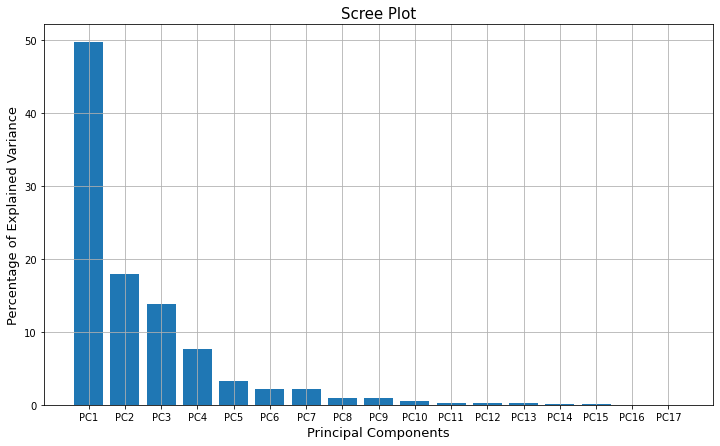

In [15]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.figure(figsize = (12,7))
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance', size = 13)
plt.xlabel('Principal Components', size = 13)
plt.title('Scree Plot', size = 15)
plt.grid()
plt.show()

Print the variance percentage from top 3 PC

In [35]:
print('%s%% variance of all dataset from top 3 PC'  %(np.sum(per_var[:3])))

81.5% variance of all dataset from top 3 PC


In [18]:
top3_pc = pca_data[:,:3]

x, y, z = top3_pc.T

## **DBSCAN**

DBSCAN algorithm is able to find high density regions and separate them from low density regions. A cluster includes core points that are neighbors (i.e. reachable from one another) and all the border points of these core points. The required condition to form a cluster is to have at least one core point. Although very unlikely, we may have a cluster with only one core point and its border points.

In [19]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit(top3_pc)
dbscan_labels = dbscan.labels_

Labeling all the dataset based on DBScan

In [20]:
labels, counts = np.unique(dbscan_labels, return_counts = True)

Plot the distribution of every labels

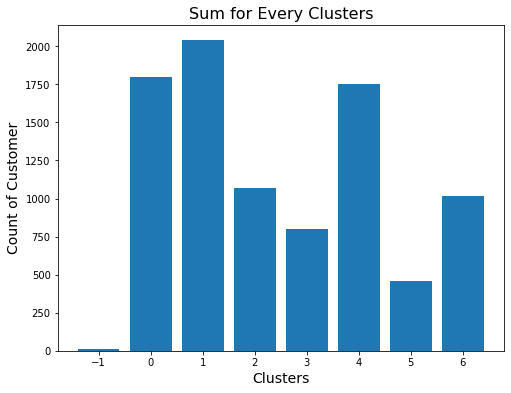

Cluster -1: 12
Cluster 0: 1800
Cluster 1: 2040
Cluster 2: 1068
Cluster 3: 800
Cluster 4: 1754
Cluster 5: 459
Cluster 6: 1016


In [23]:
plt.figure(figsize = (8,6))
plt.title('Sum for Every Clusters', size = 16)
plt.bar(labels, counts)
plt.xlabel('Clusters', size = 14)
plt.ylabel('Count of Customer', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

In [24]:
fig = px.scatter_3d(x = x, 
                    y = y, 
                    z = z,
                    color= dbscan_labels)
fig.show()

In [26]:
final_data['Label'] = dbscan_labels

We can find 12 data (cluster -1) as 'Anomaly' data. So we drop it drom the dataset

In [29]:
final_data.drop(final_data[final_data['Label'] == -1].index, inplace = True)

In [30]:
final_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,0.575157,0.956995,0.594808,0.000000,0.626492,0.000000,0.622233,0.000000,0.483972,0.000000,0.000000,0.505764,0.468293,0.642032,0.602144,0.000000,1.0,0
C10002,0.876706,0.979563,0.000000,0.000000,0.000000,0.870488,0.000000,0.000000,0.000000,0.649375,0.636475,0.000000,0.772495,0.837128,0.730821,0.681479,1.0,1
C10003,0.859446,1.000000,0.730625,0.739500,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.676244,0.783281,0.714945,0.696990,0.000000,1.0,2
C10004,0.831540,0.903287,0.773600,0.782997,0.000000,0.646367,0.483972,0.483972,0.000000,0.445179,0.490061,0.440133,0.783281,0.000000,0.000000,0.000000,1.0,3
C10005,0.782295,1.000000,0.478943,0.484761,0.000000,0.000000,0.483972,0.483972,0.000000,0.000000,0.000000,0.440133,0.496795,0.720554,0.637619,0.000000,1.0,2


In [32]:
final_data['Label'].unique()

array([0, 1, 2, 3, 4, 5, 6])

Print describe of every clusters to know the characteristics

In [36]:
for i in range(7):
    print('Cluster:', i)
    display(final_data[final_data['Label'] == i].describe())
    print('\n')

Cluster: 0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
count,1800.000000,1800.000000,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.0,1800.0,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.0
mean,0.597936,0.905480,0.670158,0.0,0.705978,0.0,0.893170,0.0,0.879103,0.0,0.0,0.642849,0.602797,0.669517,0.601191,0.449860,0.925747,0.0
std,0.174791,0.198749,0.071703,0.0,0.075538,0.0,0.136304,0.0,0.143648,0.0,0.0,0.082429,0.112134,0.143441,0.139265,0.429127,0.216240,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.483972,0.0,0.483972,0.0,0.0,0.000000,0.280079,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.519528,0.903287,0.626296,0.0,0.659657,0.0,0.813287,0.0,0.813287,0.0,0.0,0.610219,0.520893,0.643890,0.586466,0.000000,1.000000,0.0
50%,0.597071,1.000000,0.673638,0.0,0.709688,0.0,0.960923,0.0,0.938379,0.0,0.0,0.658872,0.611535,0.689390,0.611976,0.500883,1.000000,0.0
75%,0.710336,1.000000,0.714371,0.0,0.752732,0.0,1.000000,0.0,1.000000,0.0,0.0,0.676244,0.685011,0.733286,0.630019,0.890740,1.000000,0.0
max,0.966135,1.000000,0.949427,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.944000,0.958463,0.963766,1.000000,1.000000,1.000000,0.0




Cluster: 1


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
count,2040.000000,2040.000000,2040.0,2040.0,2040.0,2040.000000,2040.0,2040.0,2040.0,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.0
mean,0.798981,0.956865,0.0,0.0,0.0,0.745682,0.0,0.0,0.0,0.620218,0.632022,0.000464,0.637194,0.711415,0.659706,0.121147,0.898160,1.0
std,0.124549,0.109923,0.0,0.0,0.0,0.091083,0.0,0.0,0.0,0.135100,0.103816,0.014841,0.127269,0.151711,0.141743,0.255003,0.242258,0.0
min,0.000000,0.000000,0.0,0.0,0.0,0.487991,0.0,0.0,0.0,0.445179,0.490061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.776391,0.977409,0.0,0.0,0.0,0.686379,0.0,0.0,0.0,0.460735,0.563137,0.000000,0.531679,0.679548,0.638701,0.000000,1.000000,1.0
50%,0.822185,1.000000,0.0,0.0,0.0,0.761286,0.0,0.0,0.0,0.649375,0.636475,0.000000,0.640038,0.728193,0.679016,0.000000,1.000000,1.0
75%,0.868485,1.000000,0.0,0.0,0.0,0.814014,0.0,0.0,0.0,0.704787,0.709945,0.000000,0.748397,0.781033,0.725317,0.000000,1.000000,1.0
max,0.981538,1.000000,0.0,0.0,0.0,0.961764,0.0,0.0,0.0,1.000000,1.000000,0.505764,0.928595,0.974296,0.985824,1.000000,1.000000,1.0




Cluster: 2


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.0,1068.0,1068.000000,1068.000000,1068.0,1068.0,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.0
mean,0.680310,0.913320,0.686531,0.694881,0.0,0.0,0.699758,0.699449,0.0,0.0,0.0,0.567591,0.649808,0.684783,0.604895,0.208834,0.933907,2.0
std,0.149974,0.143700,0.088294,0.089369,0.0,0.0,0.187699,0.187783,0.0,0.0,0.0,0.109435,0.131690,0.167067,0.148287,0.360973,0.198226,0.0
min,0.000000,0.000000,0.403401,0.408301,0.0,0.0,0.483972,0.483972,0.0,0.0,0.0,0.440133,0.171725,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.582695,0.870444,0.625708,0.633309,0.0,0.0,0.483972,0.483972,0.0,0.0,0.0,0.440133,0.541768,0.665060,0.589102,0.000000,1.000000,2.0
50%,0.699292,1.000000,0.694706,0.703145,0.0,0.0,0.705961,0.705961,0.0,0.0,0.0,0.571630,0.640038,0.710099,0.621054,0.000000,1.000000,2.0
75%,0.802121,1.000000,0.749083,0.758182,0.0,0.0,0.851944,0.851944,0.0,0.0,0.0,0.658872,0.760910,0.762576,0.670338,0.483972,1.000000,2.0
max,0.969904,1.000000,0.934743,0.946098,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.952257,0.971498,1.000000,0.942116,1.000000,1.000000,2.0




Cluster: 3


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
count,800.000000,800.000000,800.000000,800.000000,800.0,800.000000,800.000000,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.0
mean,0.815641,0.976535,0.665055,0.673179,0.0,0.745272,0.657399,0.657226,0.0,0.634441,0.642202,0.552071,0.661710,0.727746,0.669269,0.138379,0.902898,3.0
std,0.091603,0.067884,0.087381,0.088392,0.0,0.092259,0.167311,0.167419,0.0,0.136016,0.105270,0.101224,0.126565,0.148372,0.137163,0.276948,0.236936,0.0
min,0.000000,0.000000,0.276698,0.280059,0.0,0.488841,0.483972,0.483972,0.0,0.445179,0.490061,0.440133,0.216696,0.000000,0.000000,0.000000,0.000000,3.0
25%,0.782842,1.000000,0.605736,0.613094,0.0,0.684509,0.483972,0.483972,0.0,0.543505,0.563137,0.440133,0.576652,0.698621,0.637549,0.000000,1.000000,3.0
50%,0.828843,1.000000,0.668411,0.676530,0.0,0.758209,0.622233,0.622233,0.0,0.649375,0.636475,0.544274,0.664136,0.750270,0.686792,0.000000,1.000000,3.0
75%,0.874981,1.000000,0.726209,0.735031,0.0,0.814997,0.766202,0.766202,0.0,0.748098,0.722437,0.624898,0.760910,0.796968,0.735066,0.000000,1.000000,3.0
max,0.984675,1.000000,0.948267,0.959787,0.0,0.945102,1.000000,1.000000,0.0,0.963925,0.970315,0.985963,0.936614,0.983742,0.912395,1.000000,1.000000,3.0




Cluster: 4


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
count,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.0,1754.000000,1754.000000,1754.000000,1754.0,1754.0,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.000000,1754.0
mean,0.743341,0.978401,0.771319,0.727747,0.739206,0.0,0.941339,0.765375,0.867360,0.0,0.0,0.738671,0.699194,0.757368,0.645019,0.383973,0.971222,4.0
std,0.112656,0.071658,0.067605,0.091322,0.083409,0.0,0.087556,0.185890,0.148753,0.0,0.0,0.085656,0.120688,0.103093,0.090905,0.421685,0.128824,0.0
min,0.000000,0.000000,0.527850,0.325134,0.360861,0.0,0.483972,0.483972,0.483972,0.0,0.0,0.505764,0.280079,0.000000,0.000000,0.000000,0.000000,4.0
25%,0.671917,1.000000,0.727298,0.669321,0.686082,0.0,0.913214,0.622233,0.813287,0.0,0.0,0.683871,0.611535,0.721331,0.614314,0.000000,1.000000,4.0
50%,0.752645,1.000000,0.774664,0.738709,0.744720,0.0,0.981341,0.784529,0.913214,0.0,0.0,0.742308,0.719895,0.764336,0.628514,0.000000,1.000000,4.0
75%,0.824915,1.000000,0.815118,0.792658,0.798077,0.0,1.000000,0.938379,1.000000,0.0,0.0,0.795086,0.783281,0.807475,0.688247,0.851944,1.000000,4.0
max,1.000000,1.000000,0.988457,0.999779,0.974508,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.977915,0.938918,1.000000,1.000000,4.0




Cluster: 5


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
count,459.000000,459.000000,459.000000,459.0,459.000000,459.000000,459.000000,459.0,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.0
mean,0.823261,0.987486,0.671102,0.0,0.706958,0.750985,0.870543,0.0,0.848455,0.611821,0.629386,0.637061,0.648766,0.744725,0.700948,0.129730,0.896296,5.0
std,0.086882,0.041342,0.071752,0.0,0.075599,0.087838,0.148041,0.0,0.158618,0.136109,0.103084,0.088461,0.126085,0.104149,0.102539,0.265246,0.253117,0.0
min,0.325561,0.640062,0.395836,0.0,0.416921,0.489728,0.483972,0.0,0.483972,0.445179,0.490061,0.440133,0.359935,0.000000,0.000000,0.000000,0.000000,5.0
25%,0.787485,1.000000,0.627645,0.0,0.661078,0.704514,0.775366,0.0,0.766202,0.445179,0.563137,0.592863,0.531679,0.709973,0.659428,0.000000,1.000000,5.0
50%,0.830043,1.000000,0.676529,0.0,0.712968,0.757546,0.923633,0.0,0.913214,0.572358,0.636475,0.648835,0.640038,0.753825,0.712249,0.000000,1.000000,5.0
75%,0.879723,1.000000,0.717140,0.0,0.755340,0.813481,1.000000,0.0,0.979563,0.704787,0.695785,0.683871,0.748397,0.792426,0.755258,0.000000,1.000000,5.0
max,0.989264,1.000000,0.921734,0.0,0.970833,0.943758,1.000000,0.0,1.000000,0.919845,1.000000,0.997024,0.928595,0.985627,0.944832,1.000000,1.000000,5.0




Cluster: 6


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.0
mean,0.834545,0.991308,0.759640,0.716647,0.727092,0.748326,0.930623,0.740761,0.861581,0.630362,0.648301,0.729738,0.699159,0.775992,0.699817,0.174840,0.942785,6.0
std,0.078822,0.033220,0.063569,0.088375,0.080006,0.087595,0.091951,0.171385,0.147867,0.140793,0.111766,0.083093,0.125559,0.099225,0.092293,0.295506,0.186302,0.0
min,0.376370,0.500883,0.569726,0.072179,0.469914,0.472516,0.483972,0.483972,0.483972,0.445179,0.490061,0.505764,0.280079,0.000000,0.000000,0.000000,0.000000,6.0
25%,0.788522,1.000000,0.714509,0.658889,0.671146,0.688883,0.884738,0.622233,0.784529,0.456846,0.563137,0.667953,0.611535,0.736770,0.656076,0.000000,1.000000,6.0
50%,0.844472,1.000000,0.761043,0.724257,0.731870,0.756398,0.971373,0.766202,0.913214,0.649375,0.636475,0.729579,0.719895,0.781607,0.707387,0.000000,1.000000,6.0
75%,0.892237,1.000000,0.803936,0.778603,0.788459,0.812593,1.000000,0.884738,0.981341,0.748098,0.733613,0.788594,0.793370,0.826564,0.749823,0.483972,1.000000,6.0
max,0.989071,1.000000,1.000000,1.000000,0.963458,1.000000,1.000000,1.000000,1.000000,0.919845,1.000000,0.985654,1.000000,0.994969,0.921479,1.000000,1.000000,6.0
